<a href="https://colab.research.google.com/github/SarthakV7/Kaggle_google_quest_challenge/blob/master/case_study_2_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from tqdm.notebook import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# reading the data into dataframe using pandas
train = pd.read_csv('drive/My Drive/case_study_2/train.csv')
test = pd.read_csv('drive/My Drive/case_study_2/test.csv')
submission = pd.read_csv('drive/My Drive/case_study_2/sample_submission.csv')

## About the data:
- The train data contains 6079 listings and each listing has 41 columns. Out of these 41 columns, ‘question_title’, ‘question_body’ and ‘answer’ are to be used as the input, and for output we have 30 target labels.
- The input features are all text features that contain the title of the question, description of the question and the answer to that question.
- The output features are all of float type, some are binary features that take a value of either 0 or 1 and some take a value between 0 and 1.

In [5]:
# Let's check the top 5 entries of train data.
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com,1.000000,0.333333,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com,1.000000,1.000000,0.000000,0.5,1.0,1.0,0.444444,0.444444,0.666667,0.0,0.000000,0.666667,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.333333,0.0,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com,0.888889,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.444444,0.333333,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.333333,0.333333,0.0,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com,0.888889,0.666667,0.666667,1.0,1.0,1.0,0.444444,0.444444,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com,1.000000,0.666667,0.000000,1.0,1.0,1.0,0.666667,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,1.000000,0.0,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [6]:
# Let's list the features provided in the train data
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [7]:
# Let's check the statistical description of the numerical features in train data
train.describe()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,4829.665899,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,0.429978,0.284915,0.038137,0.010035,0.030762,0.065225,0.497587,0.166063,0.386385,0.000823,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,2789.689555,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,0.365952,0.368826,0.153635,0.074240,0.138065,0.197582,0.423138,0.257301,0.383384,0.020489,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,2389.000000,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,4847.000000,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,7222.000000,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.666667,0.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,9647.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# These are the features provided in the test data
test.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host'],
      dtype='object')

In [9]:
test.describe()

,qa_id
count,476.000000
mean,5029.186975
std,2812.670060
min,39.000000
25%,2572.000000
50%,5093.000000
75%,7482.000000
max,9640.000000


In [10]:
# these are the features that we need to include while submitting the results
submission.columns

Index(['qa_id', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written'],
      dtype='object')

## EDA

#### Question IDs

In [11]:
# Statistical description of question_id feature (this feature is irrelevant, will be used only for mapping the results)
train['qa_id'].describe()

count    6079.000000
mean     4829.665899
std      2789.689555
min         0.000000
25%      2389.000000
50%      4847.000000
75%      7222.000000
max      9647.000000
Name: qa_id, dtype: float64

In [12]:
test['qa_id'].describe()

count     476.000000
mean     5029.186975
std      2812.670060
min        39.000000
25%      2572.000000
50%      5093.000000
75%      7482.000000
max      9640.000000
Name: qa_id, dtype: float64

#### Question title

In [13]:
# A text feature that represents the title of the question.
train['question_title'].head()

0    What am I losing when using extension tubes in...
1    What is the distinction between a city and a s...
2    Maximum protusion length for through-hole comp...
3                Can an affidavit be used in Beit Din?
4         How do you make a binary image in Photoshop?
Name: question_title, dtype: object

In [14]:
# Let's check the length of each question titles
length = train['question_title'].apply(lambda x:len(x))

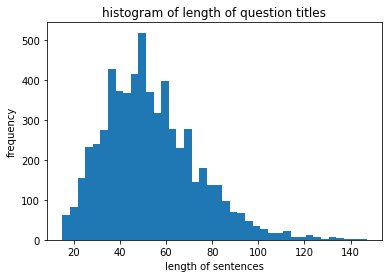

In [15]:
# histogram of length of question titles
plt.hist(length, bins=40)
plt.title('histogram of length of question titles')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [16]:
# statistical description of length of question titles
pd.Series(length).describe()

count    6079.000000
mean       53.310248
std        20.205065
min        15.000000
25%        39.000000
50%        50.000000
75%        65.000000
max       147.000000
Name: question_title, dtype: float64

In [17]:
test['question_title'].head()

0    Will leaving corpses lying around upset my pri...
1           Url link to feature image in the portfolio
2    Is accuracy, recoil or bullet spread affected ...
3       Suddenly got an I/O error from my external HDD
4    Passenger Name - Flight Booking Passenger only...
Name: question_title, dtype: object

In [18]:
length = test['question_title'].apply(lambda x:len(x))

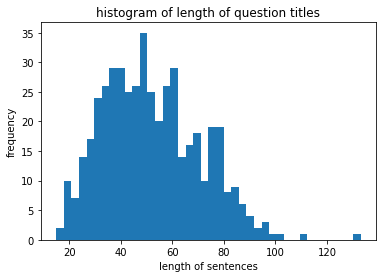

In [19]:
# histogram of length of question titles
plt.hist(length, bins=40)
plt.title('histogram of length of question titles')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [20]:
# statistical description of length of question titles
pd.Series(length).describe()

count    476.000000
mean      52.027311
std       18.754965
min       15.000000
25%       37.750000
50%       50.000000
75%       64.250000
max      133.000000
Name: question_title, dtype: float64

#### Question body

In [21]:
# this is another and the main text feature that represents the full description of the question asked
train['question_body'].head()

0    After playing around with macro photography on...
1    I am trying to understand what kinds of places...
2    I'm working on a PCB that has through-hole com...
3    An affidavit, from what i understand, is basic...
4    I am trying to make a binary image. I want mor...
Name: question_body, dtype: object

In [22]:
# Lets check the length of the questions body
length = train['question_body'].apply(lambda x:len(x))

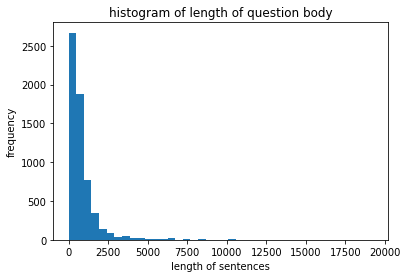

In [23]:
# let's plot the histogram of length of question body
plt.hist(length, bins=40)
plt.title('histogram of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [24]:
# Statistical description of questions body length
pd.Series(length).describe()

count     6079.000000
mean       833.760487
std       1029.046986
min          1.000000
25%        323.000000
50%        544.000000
75%        969.500000
max      19253.000000
Name: question_body, dtype: float64

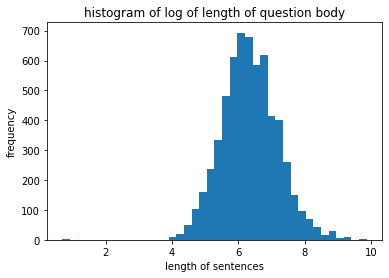

In [25]:
# Since the distribution of lengths is power-law, let's convert it to normal using log(1+x)
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [26]:
### Test data

In [27]:
test['question_body'].head()

0    I see questions/information online about how t...
1    I am new to Wordpress. i have issue with Featu...
2    To experiment I started a bot game, toggled in...
3    I have used my Raspberry Pi as a torrent-serve...
4    I have bought Delhi-London return flights for ...
Name: question_body, dtype: object

In [28]:
# length of question in test data
length = test['question_body'].apply(lambda x:len(x))

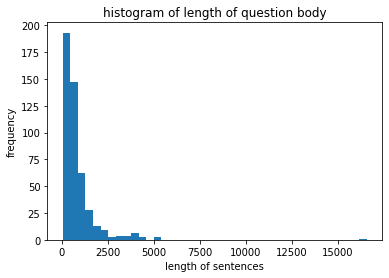

In [29]:
# histogram of length of question body
plt.hist(length, bins=40)
plt.title('histogram of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [30]:
# statisrical description of the lengths
pd.Series(length).describe()

count      476.000000
mean       844.462185
std       1110.742440
min         37.000000
25%        302.500000
50%        547.000000
75%        993.000000
max      16563.000000
Name: question_body, dtype: float64

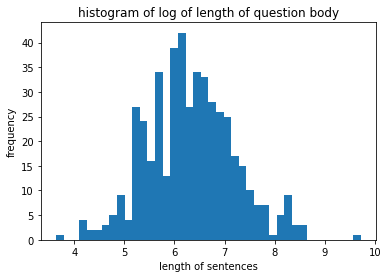

In [31]:
# Converting teh power-law distributed lengths to gaussian
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of question body')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

#### Question user name, Question user page, Answer user name, Answer user page
#### (these are irrelevant features so I have not done EDA for them)

In [32]:
train['question_user_name'].head()

0             ysap
1    russellpierce
2        Joe Baker
3       Scimonster
4          leigero
Name: question_user_name, dtype: object

In [33]:
train['question_user_page'].head()

0           https://photo.stackexchange.com/users/1024
1             https://rpg.stackexchange.com/users/8774
2    https://electronics.stackexchange.com/users/10157
3         https://judaism.stackexchange.com/users/5151
4    https://graphicdesign.stackexchange.com/users/...
Name: question_user_page, dtype: object

In [34]:
train['answer_user_name'].head()

0           rfusca
1     Erik Schmidt
2      Dwayne Reid
3    Y     e     z
4             q2ra
Name: answer_user_name, dtype: object

In [35]:
train['answer_user_page'].head()

0           https://photo.stackexchange.com/users/1917
1             https://rpg.stackexchange.com/users/1871
2    https://electronics.stackexchange.com/users/64754
3         https://judaism.stackexchange.com/users/4794
4    https://graphicdesign.stackexchange.com/users/...
Name: answer_user_page, dtype: object

#### Answer

In [36]:
# Another important text type feature that represents the answers to the questions.
train['answer'].head()

0    I just got extension tubes, so here's the skin...
1    It might be helpful to look into the definitio...
2    Do you even need grooves?  We make several pro...
3    Sending an "affidavit" it is a dispute between...
4    Check out Image Trace in Adobe Illustrator. \n...
Name: answer, dtype: object

In [37]:
# Length of answers
length = train['answer'].apply(lambda x:len(x))

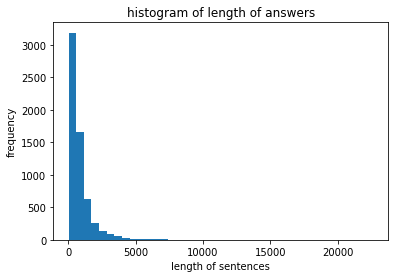

In [38]:
# histogram of length of answers
plt.hist(length, bins=40)
plt.title('histogram of length of answers')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [39]:
# statistical description of the length of answers
pd.Series(length).describe()

count     6079.000000
mean       839.396776
std       1017.388923
min         21.000000
25%        297.000000
50%        556.000000
75%       1015.500000
max      22636.000000
Name: answer, dtype: float64

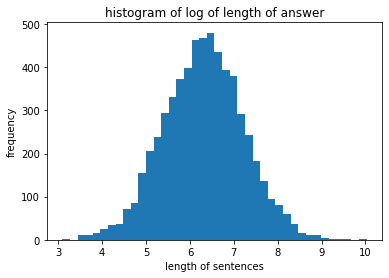

In [40]:
# histogram of log of length of answers to get them to normal distribution
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of answer')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [41]:
### Test data

In [42]:
test['answer'].head()

0    There is no consequence for leaving corpses an...
1    I think it is possible with custom fields.\n\n...
2    You do not have armour in the screenshots. Thi...
3    Your Western Digital hard drive is disappearin...
4    I called two persons who work for Saudia (tick...
Name: answer, dtype: object

In [43]:
length = test['answer'].apply(lambda x:len(x))

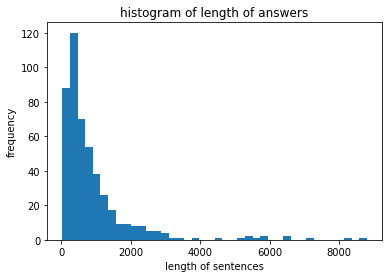

In [44]:
plt.hist(length, bins=40)
plt.title('histogram of length of answers')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

In [45]:
pd.Series(length).describe()

count     476.000000
mean      901.350840
std      1099.588287
min        36.000000
25%       311.000000
50%       566.000000
75%      1066.500000
max      8797.000000
Name: answer, dtype: float64

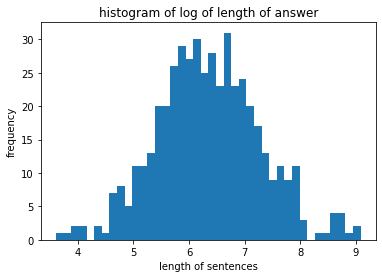

In [46]:
plt.hist(np.log1p(length), bins=40)
plt.title('histogram of log of length of answer')
plt.xlabel('length of sentences')
plt.ylabel('frequency')
plt.show()

#### URL

In [47]:
# this feature holds the webpage url's of the questions and answers

In [48]:
train['url'].head()

0    http://photo.stackexchange.com/questions/9169/...
1    http://rpg.stackexchange.com/questions/47820/w...
2    http://electronics.stackexchange.com/questions...
3    http://judaism.stackexchange.com/questions/551...
4    http://graphicdesign.stackexchange.com/questio...
Name: url, dtype: object

In [49]:
train['url'].value_counts()

http://stats.stackexchange.com/questions/125/what-is-the-best-introductory-bayesian-statistics-textbook                              12
http://programmers.stackexchange.com/questions/136987/what-does-mathematics-have-to-do-with-programming                              11
http://programmers.stackexchange.com/questions/31567/important-non-technical-course-for-programmers                                  11
http://gamedev.stackexchange.com/questions/55558/how-to-prevent-the-too-awesome-to-use-syndrome                                       9
http://academia.stackexchange.com/questions/41133/another-instructor-is-pushing-me-out-of-the-classroom-right-after-my-class-ends     7
                                                                                                                                     ..
http://english.stackexchange.com/questions/119677/how-do-you-say-x-in-x-language-whats-the-english-spanish-word-for-x                 1
http://mechanics.stackexchange.com/questions/802

#### Category

In [50]:
# This feature represents the category that the question answer pair belong to.
train['category'].head()

0    LIFE_ARTS
1      CULTURE
2      SCIENCE
3      CULTURE
4    LIFE_ARTS
Name: category, dtype: object

In [51]:
train['category'].describe()

count           6079
unique             5
top       TECHNOLOGY
freq            2441
Name: category, dtype: object

In [52]:
# There are 5 categories
train['category'].value_counts()

TECHNOLOGY       2441
STACKOVERFLOW    1253
CULTURE           963
SCIENCE           713
LIFE_ARTS         709
Name: category, dtype: int64

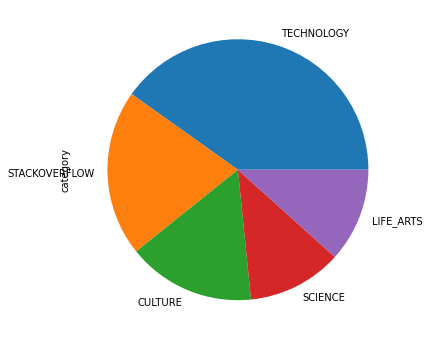

In [53]:
# this is the proportional distribution of the categories
train['category'].value_counts().plot(kind='pie', figsize=(6,6))
plt.show()

#### Host

In [54]:
# this feature represents the hostname/website of the question answer pairs
train['host'].head()

0            photo.stackexchange.com
1              rpg.stackexchange.com
2      electronics.stackexchange.com
3          judaism.stackexchange.com
4    graphicdesign.stackexchange.com
Name: host, dtype: object

In [55]:
# We can see that there are 63 type of these host names
train.host.value_counts()

stackoverflow.com                      1253
english.stackexchange.com               229
superuser.com                           227
electronics.stackexchange.com           221
serverfault.com                         213
                                       ... 
meta.christianity.stackexchange.com       4
robotics.stackexchange.com                2
meta.askubuntu.com                        2
meta.codereview.stackexchange.com         2
meta.math.stackexchange.com               2
Name: host, Length: 63, dtype: int64

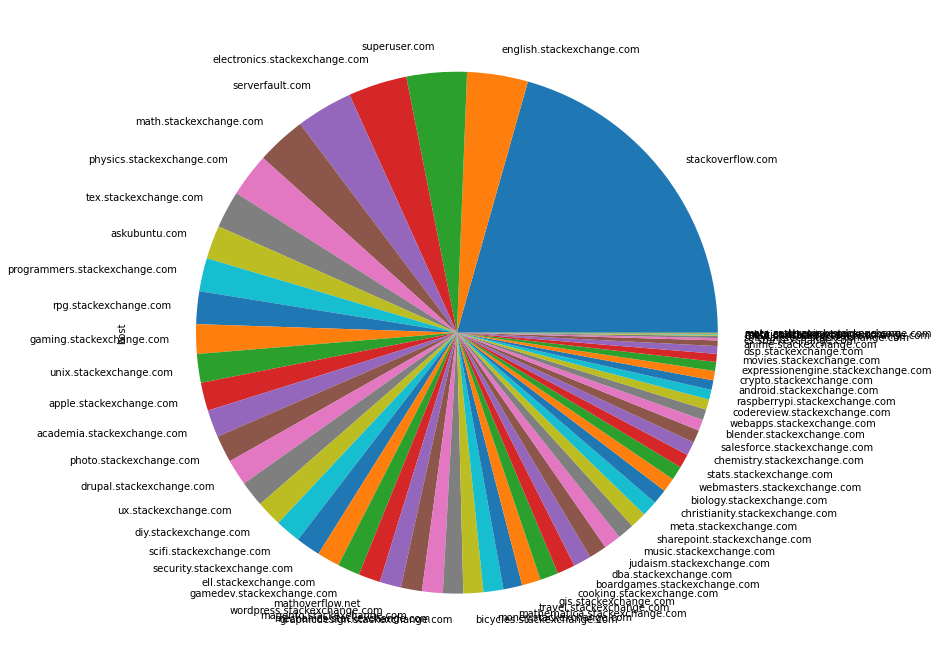

In [56]:
# pie chart representation of host proportions in train data
train.host.value_counts().plot(kind='pie', figsize=(12,12))
plt.show()

#### labels to be predicted

In [57]:
# there are 30 labels that we need to predict
train[train.columns[11:]].describe()

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,0.429978,0.284915,0.038137,0.010035,0.030762,0.065225,0.497587,0.166063,0.386385,0.000823,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,0.365952,0.368826,0.153635,0.074240,0.138065,0.197582,0.423138,0.257301,0.383384,0.020489,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.666667,0.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


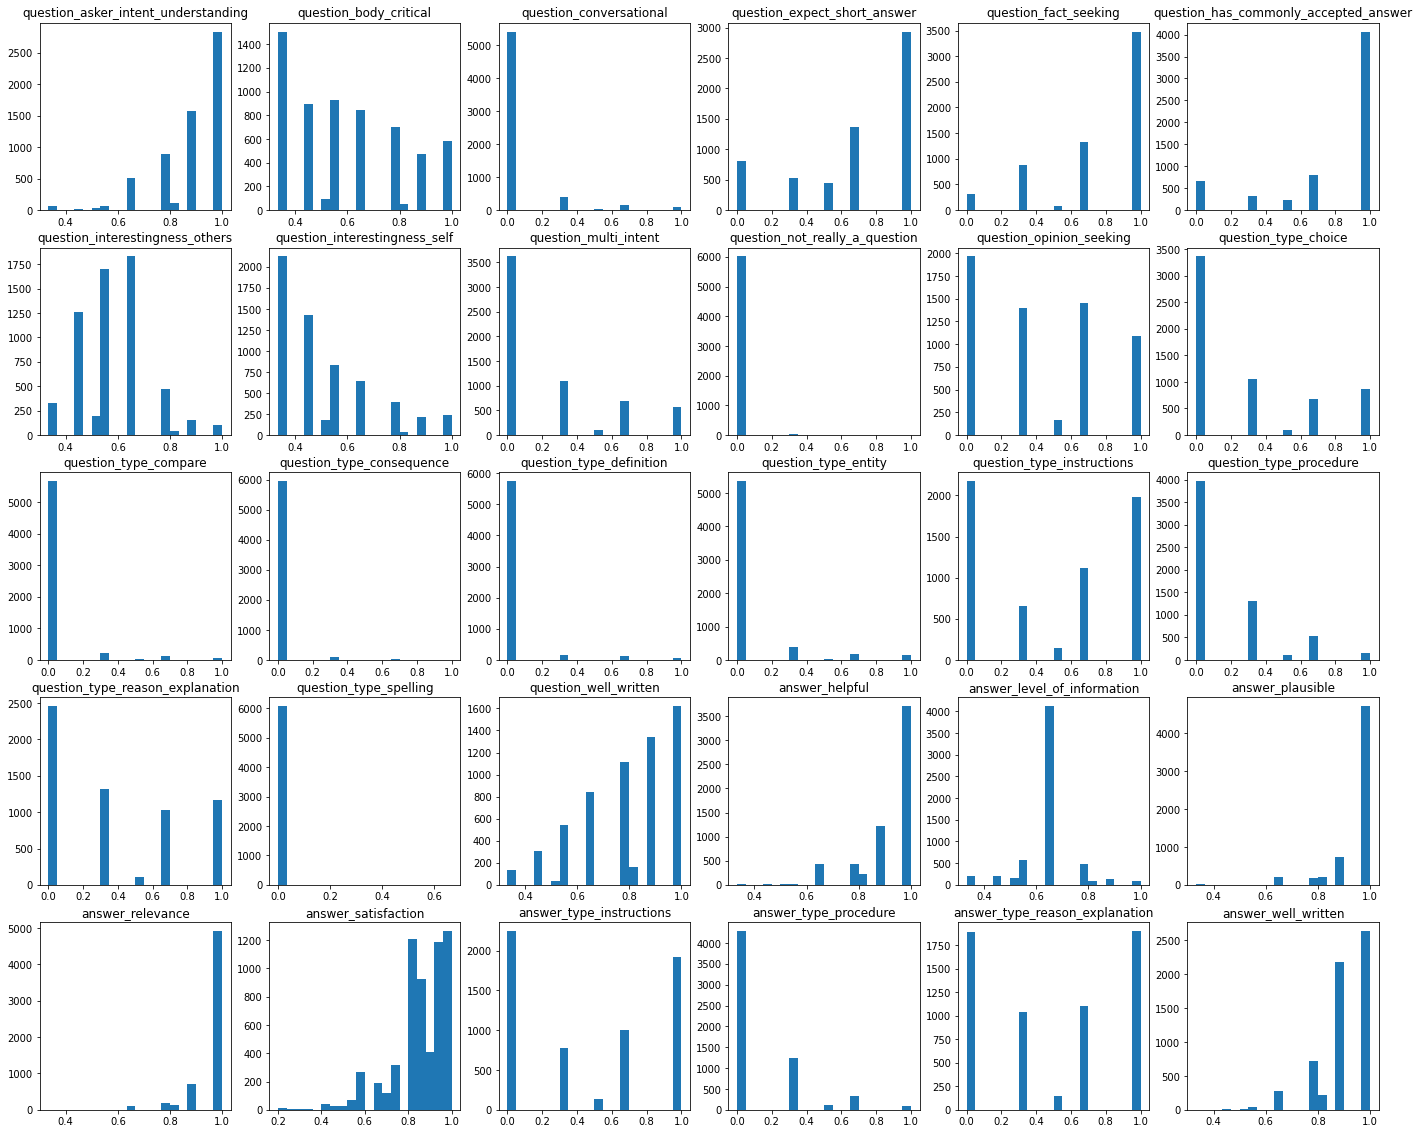

In [58]:
# histograms of the target labels
f,ax = plt.subplots(5,6, figsize=(24,20))
for i,label in enumerate(train.columns[11:]):
  plt.subplot(5,6,i+1)
  plt.hist(train[label], bins=20)
  plt.title(label)

plt.show()

In [59]:
train.shape

(6079, 41)

## Data preparation

#### Performing train test split.

In [60]:
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [61]:
y = train[train.columns[11:]] # storing the target values in y

In [62]:
from urllib.parse import urlparse
import re
from sklearn.preprocessing import OneHotEncoder

# Stripping the domain name from url

find = re.compile(r"^[^.]*")
train['clean_url'] = train['url'].apply(lambda x: re.findall(find, urlparse(x).netloc)[0])
test['clean_url'] = test['url'].apply(lambda x: re.findall(find, urlparse(x).netloc)[0])

In [63]:
# Storing the train and test data.
X = train[['question_title', 'question_body', 'answer', 'clean_url', 'category']]
X_test = test[['question_title', 'question_body', 'answer', 'clean_url', 'category']]

In [64]:
# cleaning data
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

mispell_dict = {"aren't" : "are not",
                "can't" : "cannot",
                "couldn't" : "could not",
                "couldnt" : "could not",
                "didn't" : "did not",
                "doesn't" : "does not",
                "doesnt" : "does not",
                "don't" : "do not",
                "hadn't" : "had not",
                "hasn't" : "has not",
                "haven't" : "have not",
                "havent" : "have not",
                "he'd" : "he would",
                "he'll" : "he will",
                "he's" : "he is",
                "i'd" : "I would",
                "i'd" : "I had",
                "i'll" : "I will",
                "i'm" : "I am",
                "isn't" : "is not",
                "it's" : "it is",
                "it'll":"it will",
                "i've" : "I have",
                "let's" : "let us",
                "mightn't" : "might not",
                "mustn't" : "must not",
                "shan't" : "shall not",
                "she'd" : "she would",
                "she'll" : "she will",
                "she's" : "she is",
                "shouldn't" : "should not",
                "shouldnt" : "should not",
                "that's" : "that is",
                "thats" : "that is",
                "there's" : "there is",
                "theres" : "there is",
                "they'd" : "they would",
                "they'll" : "they will",
                "they're" : "they are",
                "theyre":  "they are",
                "they've" : "they have",
                "we'd" : "we would",
                "we're" : "we are",
                "weren't" : "were not",
                "we've" : "we have",
                "what'll" : "what will",
                "what're" : "what are",
                "what's" : "what is",
                "what've" : "what have",
                "where's" : "where is",
                "who'd" : "who would",
                "who'll" : "who will",
                "who're" : "who are",
                "who's" : "who is",
                "who've" : "who have",
                "won't" : "will not",
                "wouldn't" : "would not",
                "you'd" : "you would",
                "you'll" : "you will",
                "you're" : "you are",
                "you've" : "you have",
                "'re": " are",
                "wasn't": "was not",
                "we'll":" will",
                "didn't": "did not",
                "tryin'":"trying"
                }


def clean_text(x):
    x = str(x).replace("\n","")
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
    return x


def clean_numbers(x):
    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x


def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re


def replace_typical_misspell(text):
    mispellings, mispellings_re = _get_mispell(mispell_dict)

    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)


def clean_data(df, columns: list):
    for col in tqdm(columns):
        df[col] = df[col].apply(lambda x: re.sub(' +', ' ', x)).values
        df[col] = df[col].apply(lambda x: re.sub('\n', '', x)).values
        df[col] = df[col].apply(lambda x: clean_numbers(x)).values
        df[col] = df[col].apply(lambda x: clean_text(x.lower())).values
        df[col] = df[col].apply(lambda x: replace_typical_misspell(x)).values
        df[col] = df[col].apply(lambda x: x.lower()).values
        df[col] = df[col].apply(lambda x: re.sub(' +', ' ', x)).values

    return df

In [65]:
text_features = ['question_title', 'question_body', 'answer']
cleaned_X = clean_data(X, text_features)
cleaned_test = clean_data(X_test, text_features)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [66]:
cleaned_test.head()

,question_title,question_body,answer,clean_url,category
0,will leaving corpses lying around upset my pri...,i see questions / information online about how...,there is no consequence for leaving corpses an...,gaming,CULTURE
1,url link to feature image in the portfolio,i am new to wordpress . i have issue with feat...,i think it is possible with custom fields . ad...,wordpress,TECHNOLOGY
2,"is accuracy , recoil or bullet spread affected...","to experiment i started a bot game , toggled i...",you do not have armour in the screenshots . th...,gaming,CULTURE
3,suddenly got an i / o error from my external hdd,i have used my raspberry pi as a torrent - ser...,your western digital hard drive is disappearin...,raspberrypi,TECHNOLOGY
4,passenger name - flight booking passenger only...,i have bought delhi - london return flights fo...,i called two persons who work for saudia ( tic...,travel,CULTURE


In [67]:
# train and cv split
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(cleaned_X, y, test_size=0.1, random_state=42)

In [68]:
features = ['clean_url', 'category']

ohe = OneHotEncoder()
ohe.fit(X_train[features])
categorical_features_train = ohe.transform(X_train[features]).todense()
categorical_features_cv = ohe.transform(X_cv[features]).todense()
categorical_features_test = ohe.transform(X_test[features]).todense()

#### Let's prepare text data for BERT

In [75]:
!pip install transformers

     |████████████████████████████████| 675kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 16.2MB/s 
     |████████████████████████████████| 890kB 19.4MB/s 
     |████████████████████████████████| 3.8MB 23.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=3abb934f8a34e0db1e0442c2fa1ae0956fa28bf465919303934d8c0153e4805e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, GlobalAveragePooling1D, Input, Embedding, Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
import tensorflow_hub as hub
from transformers import BertTokenizer, TFBertModel, BertConfig

In [77]:
# I've used the bert base uncased tokenizer.
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [78]:
# I've considered 400 words as feature input for bert.
def get_tokens(sentence, max_length=400):
  inputs = tokenizer.encode_plus(sentence, None, add_special_tokens=True,
                                  max_length=max_length, truncation_strategy='longest_first')
  tokens = inputs['input_ids']
  mask = [1]*len(tokens)
  segment = inputs["token_type_ids"]
  padding_length = max_length - len(tokens)
  padding_id = tokenizer.pad_token_id
  tokens = tokens + ([padding_id] * padding_length)
  mask = mask + [0] * padding_length
  segment = segment + [0] * padding_length

  return tokens, mask, segment

In [79]:

# train data
question_tokens = []
question_masks = []
question_segments = []

answer_tokens = []
answer_masks = []
answer_segments = []

# cv data
question_tokens_cv = []
question_masks_cv = []
question_segments_cv = []

answer_tokens_cv = []
answer_masks_cv = []
answer_segments_cv = []

# test data
question_tokens_test = []
question_masks_test = []
question_segments_test = []

answer_tokens_test = []
answer_masks_test = []
answer_segments_test = []

################################

# train data
for title, body in tqdm(X_train[['question_title', 'question_body']].values):
  t, m, s = get_tokens(title + body)
  question_tokens.append(t)
  question_masks.append(m)
  question_segments.append(s)

for ans in tqdm(X_train['answer'].values):
  t, m, s = get_tokens(ans)
  answer_tokens.append(t)
  answer_masks.append(m)
  answer_segments.append(s)

# cv data
for title, body in tqdm(X_cv[['question_title', 'question_body']].values):
  t, m, s = get_tokens(title + body)
  question_tokens_cv.append(t)
  question_masks_cv.append(m)
  question_segments_cv.append(s)

for ans in tqdm(X_cv['answer'].values):
  t, m, s = get_tokens(ans)
  answer_tokens_cv.append(t)
  answer_masks_cv.append(m)
  answer_segments_cv.append(s)

# test data
for title, body in tqdm(cleaned_test[['question_title', 'question_body']].values):
  t, m, s = get_tokens(title + body)
  question_tokens_test.append(t)
  question_masks_test.append(m)
  question_segments_test.append(s)

for ans in tqdm(cleaned_test['answer'].values):
  t, m, s = get_tokens(ans)
  answer_tokens_test.append(t)
  answer_masks_test.append(m)
  answer_segments_test.append(s)

In [80]:
# Converting lists to arrays.
# train data
question_tokens = np.array(question_tokens)
question_masks = np.array(question_masks)
question_segments = np.array(question_segments)

answer_tokens = np.array(answer_tokens)
answer_masks = np.array(answer_masks)
answer_segments = np.array(answer_segments)

# cv data
question_tokens_cv = np.array(question_tokens_cv)
question_masks_cv = np.array(question_masks_cv)
question_segments_cv = np.array(question_segments_cv)

answer_tokens_cv = np.array(answer_tokens_cv)
answer_masks_cv = np.array(answer_masks_cv)
answer_segments_cv = np.array(answer_segments_cv)

# test data
question_tokens_test = np.array(question_tokens_test)
question_masks_test = np.array(question_masks_test)
question_segments_test = np.array(question_segments_test)

answer_tokens_test = np.array(answer_tokens_test)
answer_masks_test = np.array(answer_masks_test)
answer_segments_test = np.array(answer_segments_test)

In [81]:
tf.keras.backend.clear_session()
max_seq_length = 400

input_question_tokens = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_question_tokens")
input_question_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_question_mask")
input_question_segment = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_question_segment")

input_answer_tokens = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_answer_tokens")
input_answer_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_answer_mask")
input_answer_segment = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_answer_segment")

#bert layer
config = BertConfig()
config.output_hidden_states = False

bert_model = TFBertModel.from_pretrained("bert-base-uncased", config=config)

question_output, _ = bert_model(input_question_tokens, attention_mask=input_question_mask, token_type_ids=input_question_segment)
answer_output, _ = bert_model(input_answer_tokens, attention_mask=input_answer_mask, token_type_ids=input_answer_segment)

question_gap = GlobalAveragePooling1D()(question_output)
answer_gap = GlobalAveragePooling1D()(answer_output)

# output layers
concat_text = concatenate([question_gap, answer_gap])
dropout_layer = Dropout(0.2)(concat_text)
dense_3 = Dense(30, activation='sigmoid')(dropout_layer)

model = Model(inputs=[input_question_tokens, input_question_mask, input_question_segment, input_answer_tokens, 
                      input_answer_mask, input_answer_segment], outputs=dense_3)

In [82]:
# model.load_weights("drive/My Drive/bert_case_study.h5")

In [83]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_question_tokens (InputLay [(None, 400)]        0                                            
__________________________________________________________________________________________________
input_question_mask (InputLayer [(None, 400)]        0                                            
__________________________________________________________________________________________________
input_question_segment (InputLa [(None, 400)]        0                                            
__________________________________________________________________________________________________
input_answer_tokens (InputLayer [(None, 400)]        0                                            
______________________________________________________________________________________________

In [84]:
config

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "type_vocab_size": 2,
  "vocab_size": 30522
}

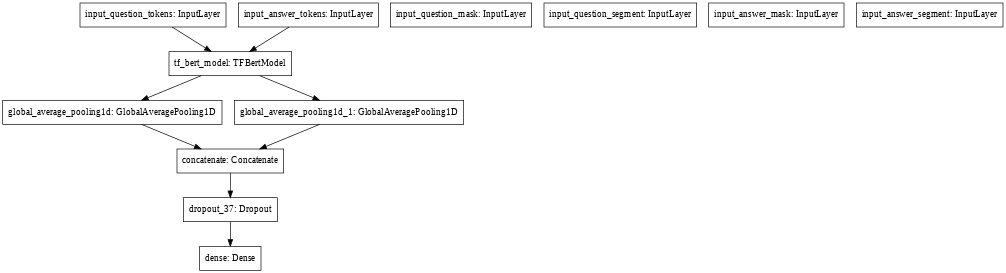

In [85]:
tf.keras.utils.plot_model(
 model,
 to_file='model.png',
 show_shapes=False,
 show_layer_names=True,
 rankdir='TB',
 expand_nested=False,
 dpi=48
)

In [ ]:
from scipy.stats import spearmanr
def compute_spearmanr_ignore_nan(trues, preds):
    rhos = []
    for tcol, pcol in zip(np.transpose(trues), np.transpose(preds)):
        rhos.append(spearmanr(tcol, pcol).correlation)
    return np.nanmean(rhos)

In [ ]:
def rhos(y, y_pred):
  return tf.py_function(compute_spearmanr_ignore_nan, (y, y_pred), tf.double)

In [ ]:
metrics = [rhos]
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1, 
                                                 mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-7)

In [ ]:
input_data = {'input_question_tokens': question_tokens, 'input_question_mask': question_masks, 'input_question_segment': question_segments, 
              'input_answer_tokens': answer_tokens, 'input_answer_mask': answer_masks,
              'input_answer_segment': answer_segments}

cv_data = {'input_question_tokens': question_tokens_cv, 'input_question_mask': question_masks_cv, 'input_question_segment': question_segments_cv, 
              'input_answer_tokens': answer_tokens_cv, 'input_answer_mask': answer_masks_cv,
              'input_answer_segment': answer_segments_cv}

test_data = {'input_question_tokens': question_tokens_test, 'input_question_mask': question_masks_test, 'input_question_segment': question_segments_test, 
              'input_answer_tokens': answer_tokens_test, 'input_answer_mask': answer_masks_test,
              'input_answer_segment': answer_segments_test}

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00002)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
for i in range(4):
  model.fit(input_data, y_train.values, epochs=1, batch_size=4, validation_data=(cv_data, y_cv.values))
  model.save_weights("drive/My Drive/bert_case_study.h5")

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


1368/1368 [==============================] - 1409s 1s/step - loss: 0.3372 - rhos: 0.5113 - val_loss: 0.3755 - val_rhos: 0.3954


In [ ]:
y_test_pred = model.predict(test_data)

In [ ]:
columns = y_train.columns
output = pd.DataFrame(y_test_pred, columns=columns, index=test['qa_id'])
output = output.reset_index()

In [ ]:
output.head()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.966951,0.717265,0.156473,0.517016,0.595898,0.589739,0.679116,0.638490,0.657242,0.001721,0.827268,0.579404,0.020663,0.100711,0.005482,0.004336,0.023569,0.038893,0.873546,0.003014,0.941831,0.857148,0.622507,0.956064,0.924443,0.595407,0.004975,0.014764,0.945736,0.819970
1,46,0.899476,0.624526,0.007951,0.754078,0.825417,0.903666,0.595645,0.493618,0.050361,0.003852,0.420714,0.345912,0.010329,0.001165,0.005538,0.009752,0.835175,0.186524,0.049473,0.000764,0.680810,0.923925,0.649230,0.971986,0.979873,0.864427,0.897448,0.119088,0.032296,0.890129
2,70,0.909419,0.788693,0.009071,0.867257,0.973069,0.992692,0.595495,0.402400,0.113762,0.001141,0.087944,0.834577,0.006366,0.026277,0.002831,0.002620,0.067353,0.056612,0.534431,0.000875,0.883507,0.925721,0.615189,0.987705,0.987636,0.873936,0.022410,0.055010,0.927210,0.910698
3,132,0.918406,0.521850,0.004729,0.858040,0.755406,0.947979,0.506386,0.422268,0.120170,0.005136,0.609085,0.038602,0.004152,0.003145,0.003761,0.003454,0.872843,0.148684,0.458024,0.000743,0.697325,0.925615,0.717166,0.955624,0.980522,0.896562,0.793793,0.092820,0.664294,0.906392
4,200,0.961149,0.419579,0.020796,0.967165,0.803654,0.956524,0.642718,0.594392,0.016923,0.004165,0.501766,0.102953,0.002254,0.004969,0.004606,0.060819,0.098162,0.051110,0.563401,0.001764,0.720855,0.867836,0.684987,0.963077,0.979515,0.780538,0.163895,0.091639,0.725537,0.892231


In [ ]:
output.to_csv('bert_submission.csv', index=False)

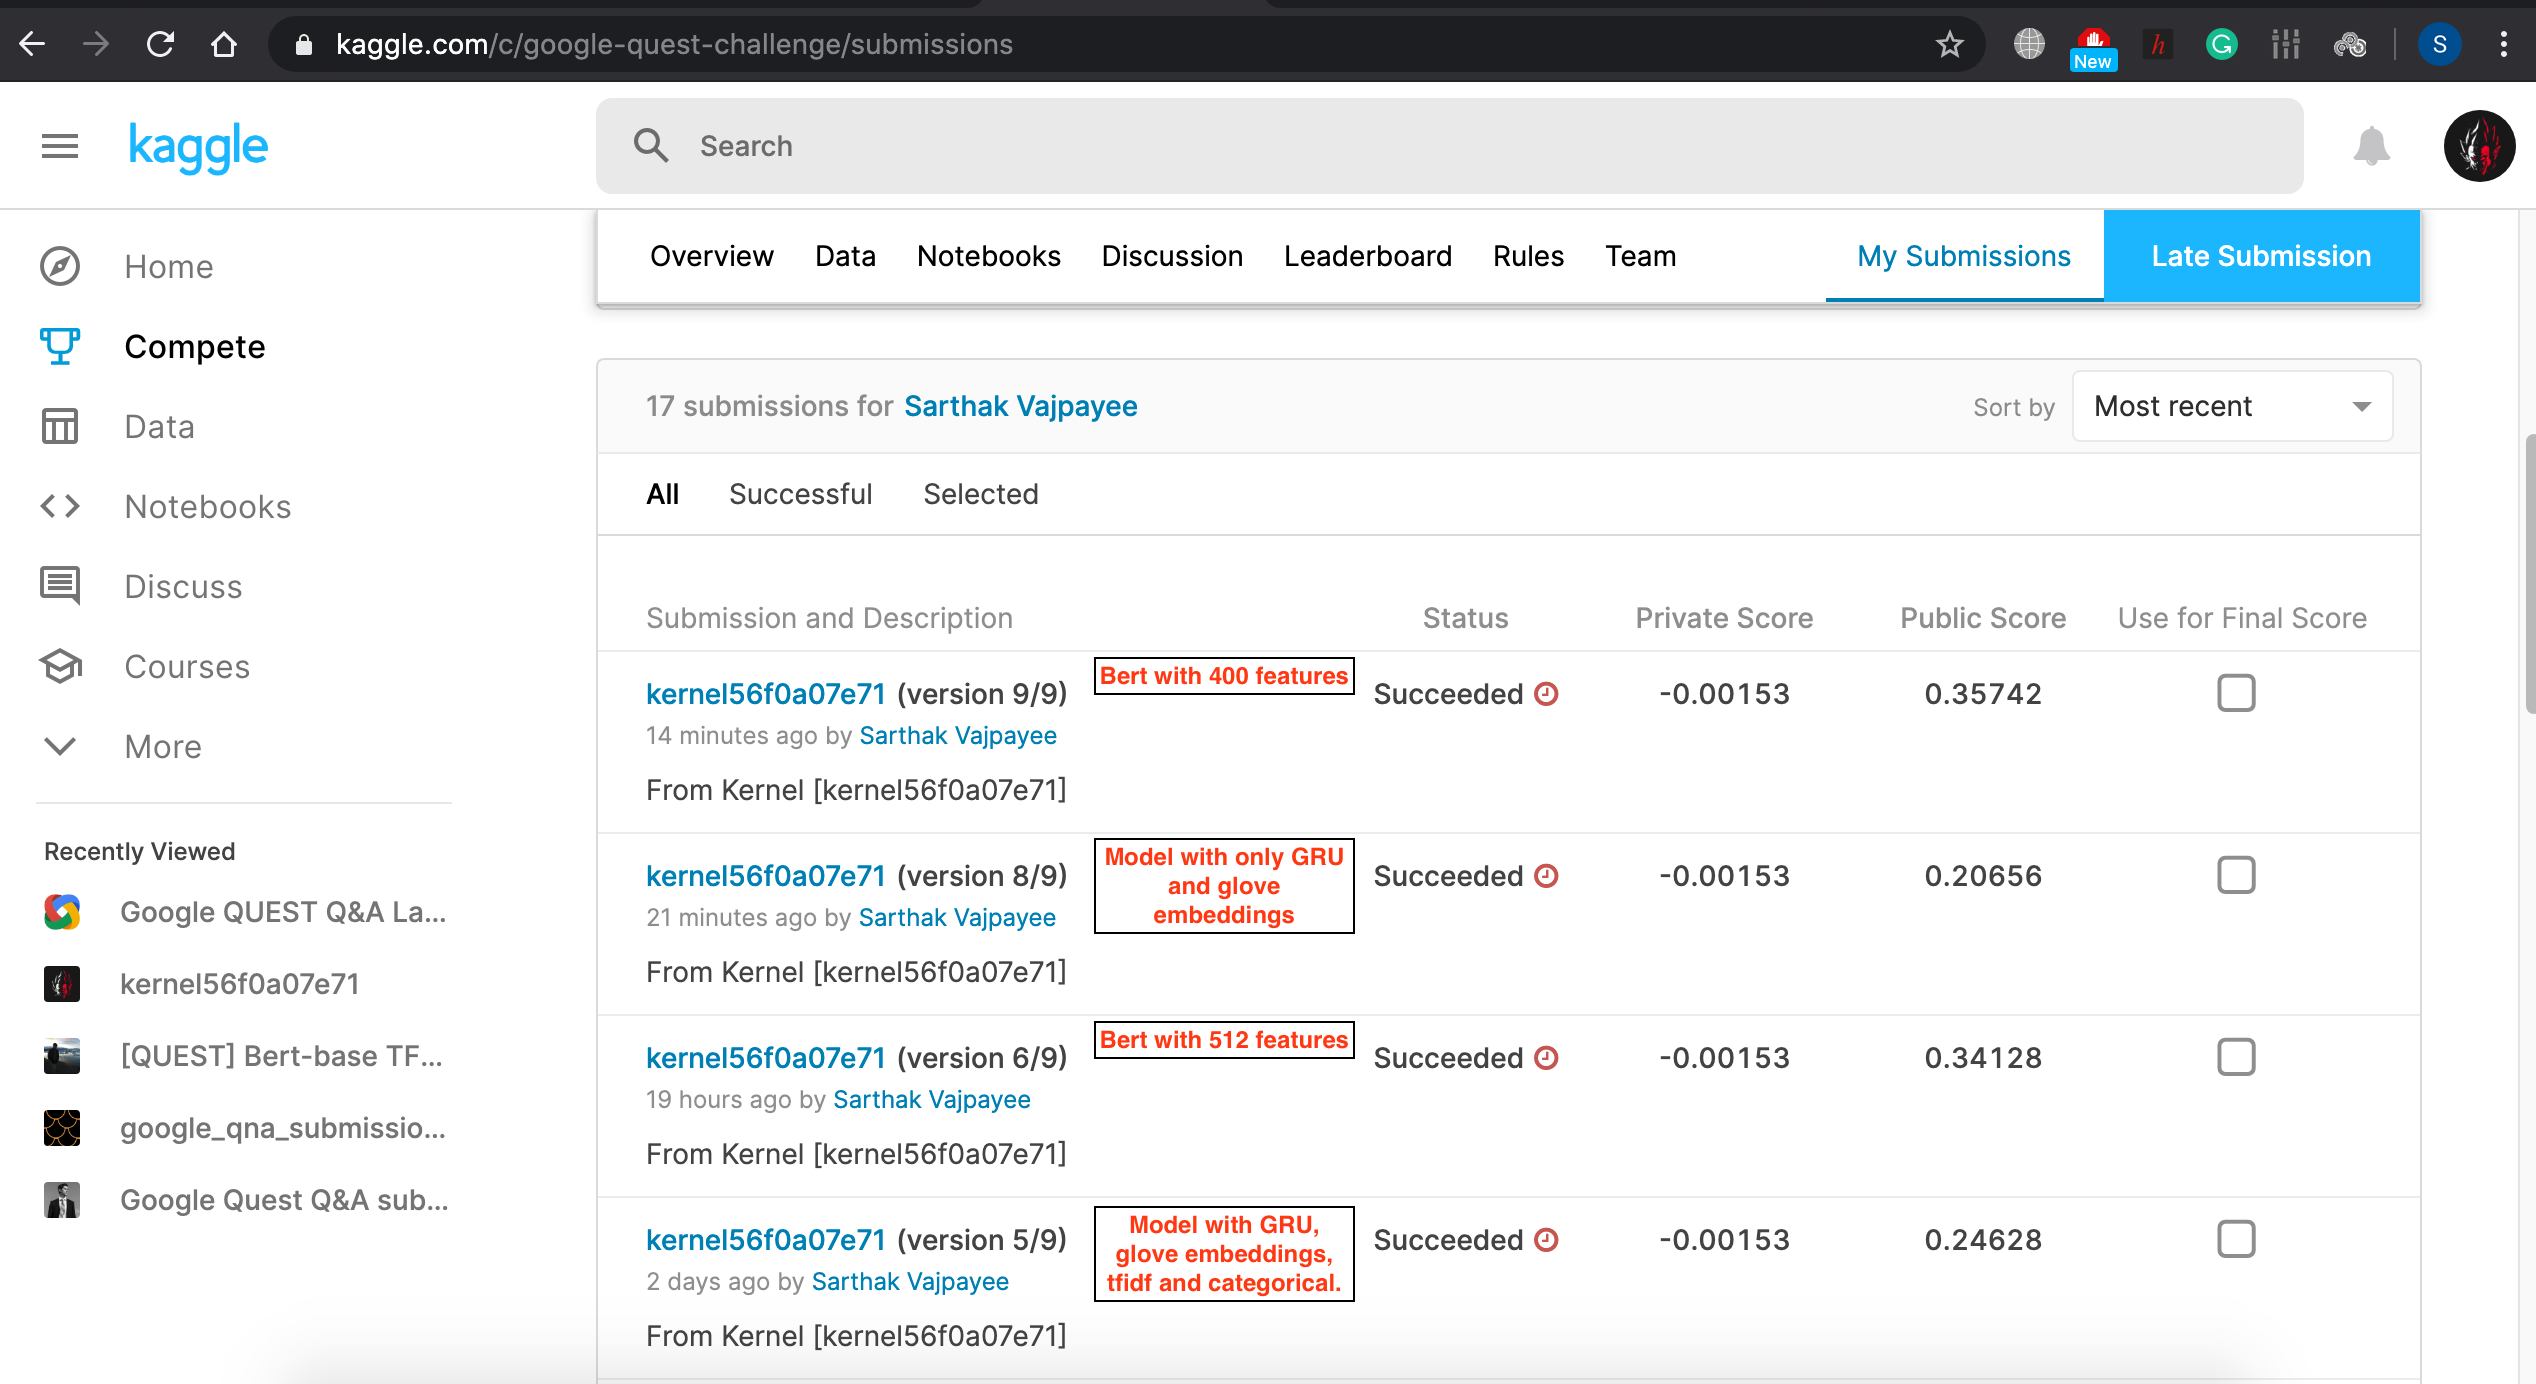

In [1]:
%matplotlib inline
from IPython.display import Image
Image('score.png', width=860, height=480)

### Using the above baseline bert model, I was able to achieve a public score of 0.35742
#### The score is not that great so I'll be modifying the BERT model so that the performance is better and the score is > 0.395 (top 10%)